<a href="https://colab.research.google.com/github/Zakria-Malik/Final_year_project_app/blob/main/FYP_Heart_Diseases_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import necessary Libraries for loading datasets



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Heart Diseases dataset

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Check for Rows and Columns in dataset

In [ ]:
df.shape
# This shows that our dataset has 1025 rows and 14 columns

(1025, 14)

Check for missing values

In [ ]:
print("Missing values:", df.isnull().sum())
# All the values are zero with respect to each feature, so our dataset have no null value.

Missing values: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Check the datatypes for each feature.

In [ ]:
print("\nData types of each feature:\n")
print(df.dtypes)


Data types of each feature:

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
# As oldpeak has float values, so we convert oldpeak from float64 to int64 (truncating decimals)
df['oldpeak'] = df['oldpeak'].astype(int)

In [ ]:
# Now, we check the datatypes
print("\nData types of each feature:\n")
print(df.dtypes)


Data types of each feature:

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object


Summary of the dataset

In [ ]:
# Summary of the dataset (optional but helpful)
print("\nDataset Info:\n")
print(df.info())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   cp        1025 non-null   int64
 3   trestbps  1025 non-null   int64
 4   chol      1025 non-null   int64
 5   fbs       1025 non-null   int64
 6   restecg   1025 non-null   int64
 7   thalach   1025 non-null   int64
 8   exang     1025 non-null   int64
 9   oldpeak   1025 non-null   int64
 10  slope     1025 non-null   int64
 11  ca        1025 non-null   int64
 12  thal      1025 non-null   int64
 13  target    1025 non-null   int64
dtypes: int64(14)
memory usage: 112.2 KB
None


Plotting the initial class distribution

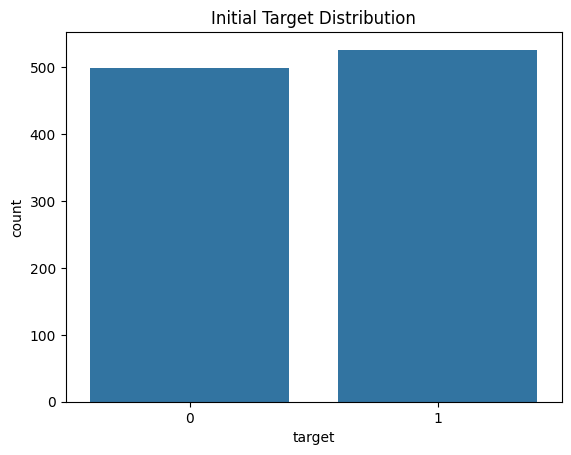

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Initial Target Distribution")
plt.show()

Now, we'll check the distribution w.r.t target class

In [ ]:
print("Target class distribution:\n", df["target"].value_counts())

Target class distribution:
 target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# Split the features and labels into x and y
X = df.drop("target", axis=1)
y = df["target"]


Balancing of the imbalanced data

In [ ]:
# to balance the imbalanced data, we use SMOTE library
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
#check the balanced distribution
print("\nBalanced target distribution:\n", pd.Series(y_balanced).value_counts())



Balanced target distribution:
 target
0    526
1    526
Name: count, dtype: int64


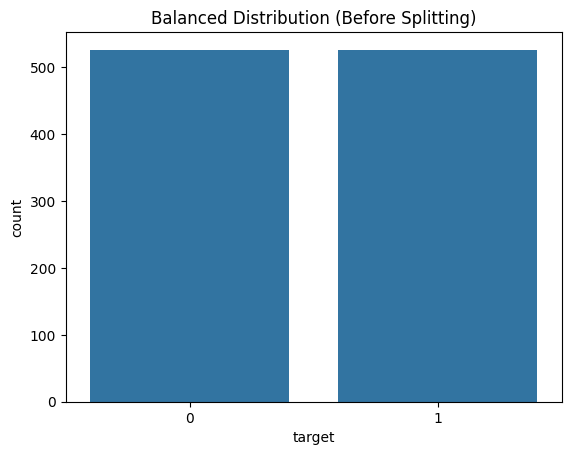

In [ ]:
sns.countplot(x=y_balanced)
plt.title("Balanced Distribution (Before Splitting)")
plt.show()

Splitting the data into the training and testing sets

In [ ]:
# Import libraries for training and testing
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

Feature Scaling

In [ ]:
# Import StandardScaler from Scikit learn library
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL Training

In [ ]:
# Import Algorithms, as the dataset lead to binary classification, so we'll use classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# now we'll define model on 6 classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

Predictions:

In [ ]:
#Import libraries for predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Now, calculate the result(prediction)
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.8056872037914692
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79       106
           1       0.76      0.89      0.82       105

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.80       211
weighted avg       0.81      0.81      0.80       211


Random Forest
Accuracy: 0.995260663507109
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.99      1.00      1.00       105

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211


SVM
Accuracy: 0.9241706161137441
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       106
           1       0.91      0.94     

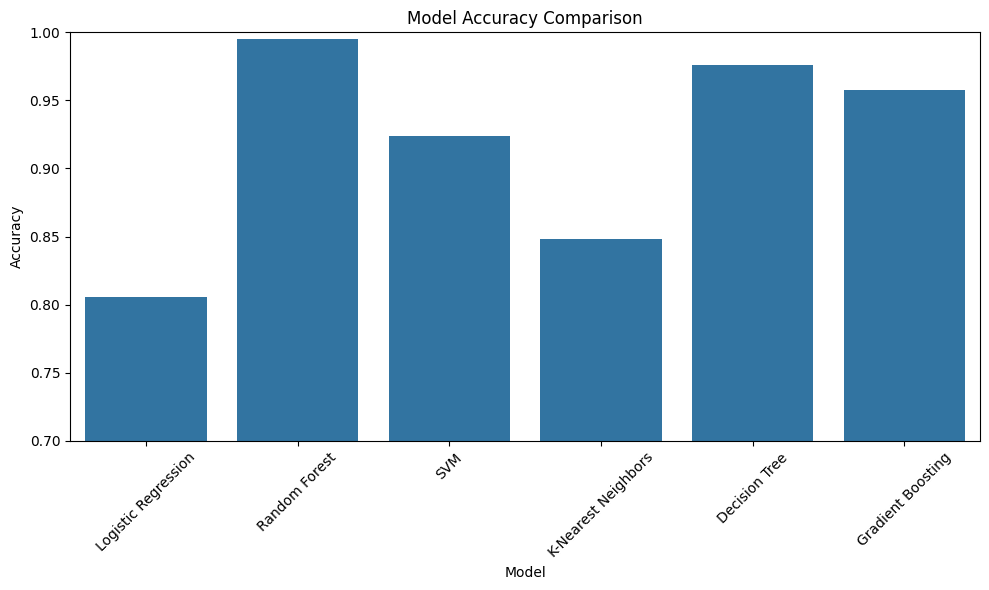

In [ ]:
# Plot the graph to compare accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1.0)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

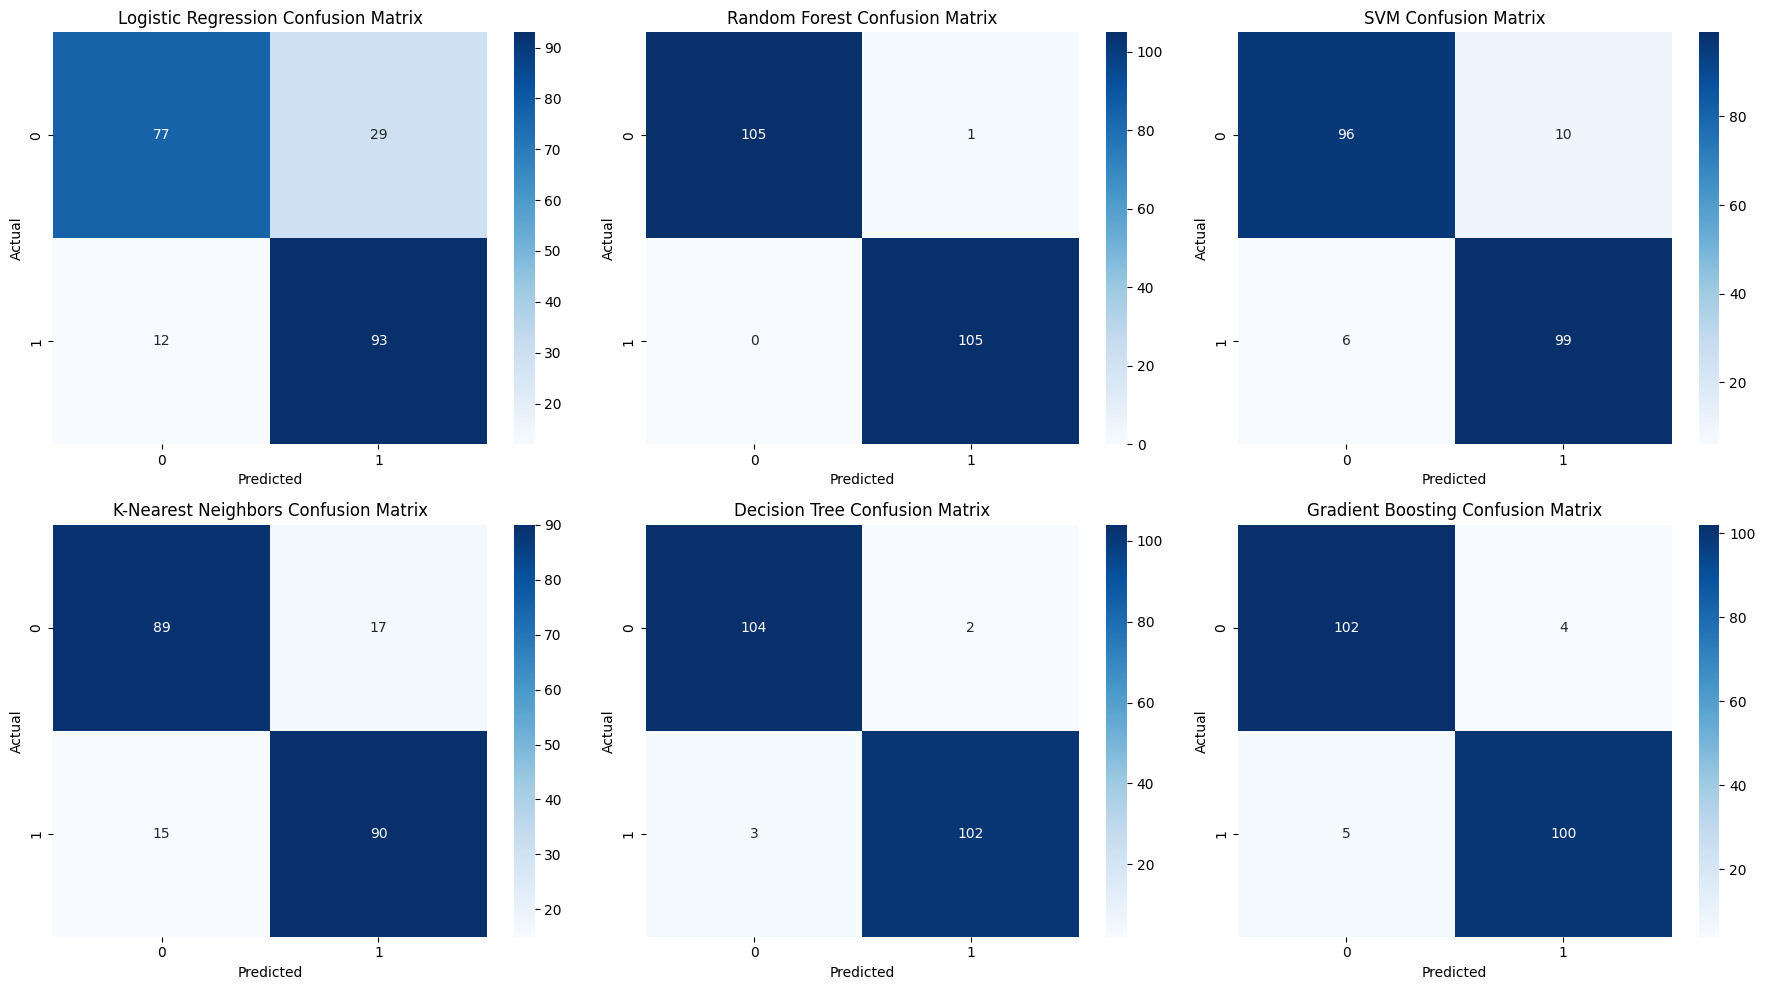

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

Now check, whether prediction is right or wrong

In [ ]:
input_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 3, 0, 0, 1]])
input_scaled = scaler.transform(input_data)
prediction = models["Random Forest"].predict(input_scaled)
if prediction[0] == 1:
    print("The model predicts: Person has heart disease.")
else:
    print("The model predicts: Person does NOT have heart disease.")

The model predicts: Person has heart disease.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
